#### numpy & list

In [1]:
import numpy as np

##리스트는 그냥 True, False 만 판단
print("\n=============list=============")
print("===========반복문 시작==========\n")
y = [0,1,2,3,1,2,4]
for i in [0,1]:
    print("기존:",y)
    print("반복",i,"값:", y[y==i])
    y[y==i] = 100
    print("y:",y)
    print("----------------------------")    
print(y,"\n===========반복문 끝==========\n")

## 넘파이 True의 값 출력 가능
print("\n=============numpy=============")
print("===========반복문 시작==========\n")
y1 = np.array([0,1,2,3,1,2,4])
for i in [0,1]:
    print("기존:",y)
    print("반복",i,"값:", y1[y1==i])
    y1[y1==i] = 100
    print("y:",y1)
    print("----------------------------")
    
print(y,"\n===========반복문 끝==========")


=============list=============
===========반복문 시작==========

기존: [0, 1, 2, 3, 1, 2, 4]
반복 0 값: 0
y: [100, 1, 2, 3, 1, 2, 4]
----------------------------
기존: [100, 1, 2, 3, 1, 2, 4]
반복 1 값: 100
y: [100, 1, 2, 3, 1, 2, 4]
----------------------------
[100, 1, 2, 3, 1, 2, 4] 
===========반복문 끝==========


=============numpy=============
===========반복문 시작==========

기존: [100, 1, 2, 3, 1, 2, 4]
반복 0 값: [0]
y: [100   1   2   3   1   2   4]
----------------------------
기존: [100, 1, 2, 3, 1, 2, 4]
반복 1 값: [1 1]
y: [100 100   2   3 100   2   4]
----------------------------
[100, 1, 2, 3, 1, 2, 4] 
===========반복문 끝==========


In [5]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [6]:
## 데이터 셋 생성
### make_blobs: 분류용 데이터셋

n_dim = 2 
# 2차원 벡터 형태

# 레이블 데이터: 몇 번째 클러스터에 속해 있는지 알려주는 인덱스
x_train, y_train = make_blobs(n_samples=80, n_features = n_dim,
                             centers = [[1,1],[-1,-1],[1,-1],[-1,1]],
                             shuffle = True, cluster_std = 0.3)
x_test, y_test = make_blobs(n_samples=20, n_features = n_dim,
                             centers = [[1,1],[-1,-1],[1,-1],[-1,1]],
                             shuffle = True, cluster_std = 0.3)

In [7]:
## 4개의 레이블을 2개의 레이블로 변경
### 0,1 -> 0 | 2,3 -> 1

## y_train = label_map(y_train, [0,1], 0)

def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_ #넘파이라 가능한 수식 #True 일때의 값 꺼내기 가능
    return y

In [8]:
y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

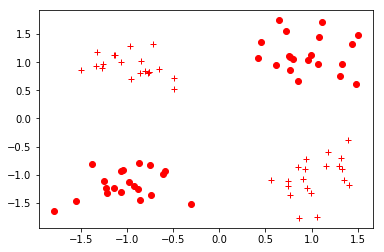

In [9]:
## 시각화
def vis_data(x,y = None, c ='r'):
    if y is None:
        y=[None] * len(x)
    for x_,y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor = 'none', makeredgecolor = c)
        else:
            plt.plot(x_[0], x_[1] , c+'o' if y_ == 0 else c+ '+')
            
plt.figure()
vis_data(x_train, y_train, c= 'r')
plt.show()

In [10]:
## 넘파이 벡터 형식 데이터를 파이토치 텐서로 바꿔주기
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [11]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [12]:
## 신경망 모델 생성 및 관련 변수와 알고리즘 정의
model = NeuralNet(2,5)
learning_rate = 0.03
criterion = torch.nn.BCELoss() #Binary ross Entropy
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) 
# 새가중치 = 가중치 - 학습률*가중치에 대한 기울기 

In [13]:
## 학습 전 모델 성능 평가
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print("Before Training, test loss is {}".format(test_loss_before.item()))

Before Training, test loss is 0.6945712566375732


In [14]:
## 신경망 학습
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 ==0:
        print("Train Loss at {} is {}".format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train Loss at 0 is 0.675230860710144
Train Loss at 100 is 0.592369794845581
Train Loss at 200 is 0.5254018902778625
Train Loss at 300 is 0.47147494554519653
Train Loss at 400 is 0.4243232309818268
Train Loss at 500 is 0.3786807358264923
Train Loss at 600 is 0.3329222798347473
Train Loss at 700 is 0.28827640414237976
Train Loss at 800 is 0.24608254432678223
Train Loss at 900 is 0.2109963595867157
Train Loss at 1000 is 0.18182018399238586
Train Loss at 1100 is 0.15807290375232697
Train Loss at 1200 is 0.13859643042087555
Train Loss at 1300 is 0.12260892242193222
Train Loss at 1400 is 0.10962005704641342
Train Loss at 1500 is 0.09894417971372604
Train Loss at 1600 is 0.08999079465866089
Train Loss at 1700 is 0.08191107213497162
Train Loss at 1800 is 0.07489931583404541
Train Loss at 1900 is 0.06885739415884018


In [15]:
## 학습 후 모델 성능 평가
model.eval()
test_loss = criterion(model(x_test).squeeze(), y_test)
print("After Training, test loss is {}".format(test_loss.item()))

After Training, test loss is 0.05481796711683273


In [16]:
## 학습된 가중치 저장
torch.save(model.state_dict(), './model.pt')
print("state_dict format of the model: {}".format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 0.5096,  0.6874],
        [ 0.4176,  0.6812],
        [-0.4516,  1.6492],
        [ 1.9062, -1.0143],
        [ 1.6311,  1.8788]])), ('linear_1.bias', tensor([-0.2750, -0.3183,  0.9810, -0.1575, -0.4853])), ('linear_2.weight', tensor([[-0.6829, -0.4928,  1.9429,  2.1345, -2.3833]])), ('linear_2.bias', tensor([-1.8645]))])


In [17]:
## 저장된 가중치를 불러와 새로운 모델에 적용(전이학습)
new_model = NeuralNet(2,5)
new_model.load_state_dict(torch.load('./model.pt'))
#stat_dict() 함수는 모델 내 가중치들이 딕셔너리 형태로 {연산이름: 가중치 텐서와 평향 텐서}
new_model.eval()
print("벡터 [-1,1] 이 레이블 1을 가질 확률은 {}".format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1,1] 이 레이블 1을 가질 확률은 0.984067976474762
